In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation


In [2]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 70

In [5]:
data_dir =r"C:\Users\chpk9\Pavan\New folder\RiceDiseasePrediction\Data"

In [6]:
image_generator = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15,
                                     validation_split=0.2)

train_data_gen = image_generator.flow_from_directory(data_dir,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     subset='training',
                                                     class_mode='sparse')
    
val_data_gen = image_generator.flow_from_directory(data_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               subset='validation',
                                               class_mode='sparse')

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [7]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

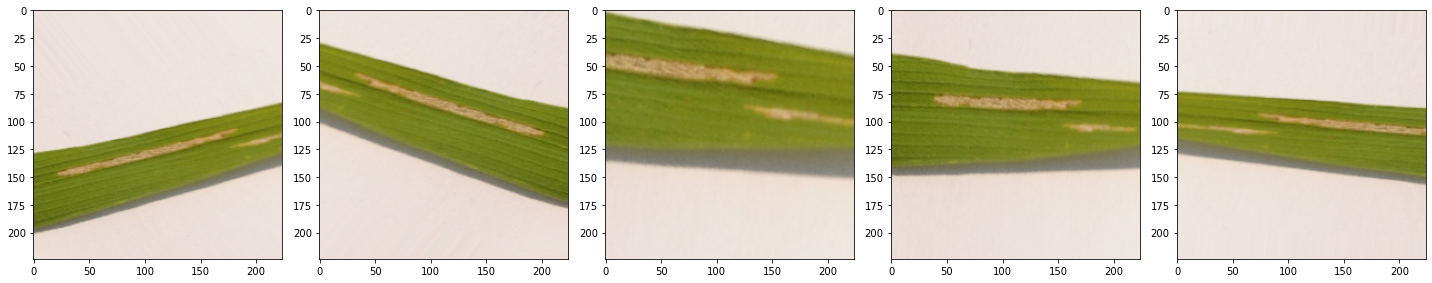

In [8]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

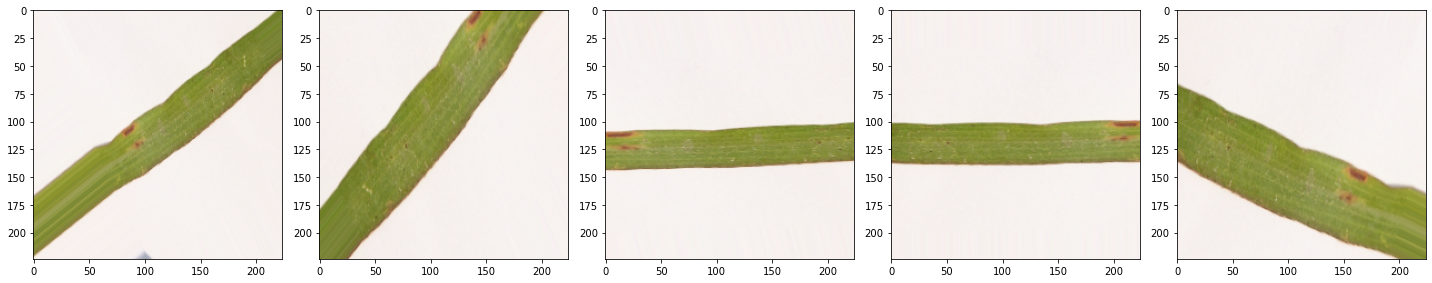

In [9]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [10]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [11]:
#Fit
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

C:\Users\chpk9\AppData\Local\Temp\ipykernel_8364\1447153134.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/70
12/12 [==============================] - 19s 1s/step - loss: 1.3776 - accuracy: 0.3750 - val_loss: 1.1031 - val_accuracy: 0.3043
Epoch 2/70
12/12 [==============================] - 14s 1s/step - loss: 1.1009 - accuracy: 0.3333 - val_loss: 1.1342 - val_accuracy: 0.3043
Epoch 3/70
12/12 [==============================] - 15s 1s/step - loss: 1.1262 - accuracy: 0.3958 - val_loss: 1.0950 - val_accuracy: 0.4348
Epoch 4/70
12/12 [==============================] - 16s 1s/step - loss: 1.0830 - accuracy: 0.4375 - val_loss: 1.7231 - val_accuracy: 0.3043
Epoch 5/70
12/12 [==============================] - 15s 1s/step - loss: 1.0695 - accuracy: 0.3854 - val_loss: 1.0308 - val_accuracy: 0.6522
Epoch 6/70
12/12 [==============================] - 15s 1s/step - loss: 0.9861 - accuracy: 0.4062 - val_loss: 1.0826 - val_accuracy: 0.5652
Epoch 7/70
12/12 [==============================] - 15s 1s/step - loss: 0.9277 - accuracy: 0.5104 - val_loss: 0.9030 - val_accuracy: 0.5652
Epoch 8/70
12/12 [==

12/12 [==============================] - 13s 1s/step - loss: 0.5226 - accuracy: 0.7708 - val_loss: 0.9585 - val_accuracy: 0.7826
Epoch 60/70
12/12 [==============================] - 13s 1s/step - loss: 0.5290 - accuracy: 0.7812 - val_loss: 2.4198 - val_accuracy: 0.6522
Epoch 61/70
12/12 [==============================] - 14s 1s/step - loss: 0.5217 - accuracy: 0.7604 - val_loss: 1.9483 - val_accuracy: 0.6522
Epoch 62/70
12/12 [==============================] - 13s 1s/step - loss: 0.4737 - accuracy: 0.8229 - val_loss: 1.5977 - val_accuracy: 0.8261
Epoch 63/70
12/12 [==============================] - 14s 1s/step - loss: 0.3853 - accuracy: 0.8125 - val_loss: 1.7009 - val_accuracy: 0.8261
Epoch 64/70
12/12 [==============================] - 14s 1s/step - loss: 0.2995 - accuracy: 0.8750 - val_loss: 1.8671 - val_accuracy: 0.7391
Epoch 65/70
12/12 [==============================] - 14s 1s/step - loss: 0.3440 - accuracy: 0.8125 - val_loss: 1.4071 - val_accuracy: 0.6522
Epoch 66/70
12/12 [======

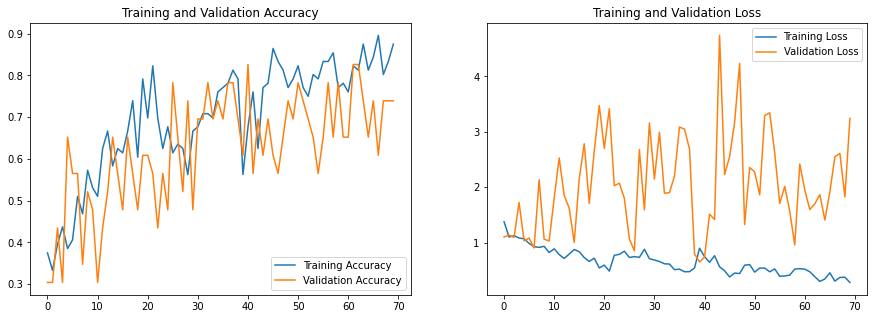

In [12]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
scores = model.evaluate(train_data_gen)

12/12 [==============================] - 10s 792ms/step - loss: 0.4440 - accuracy: 0.8021


In [14]:
scores = model.evaluate(val_data_gen)

3/3 [==============================] - 2s 600ms/step - loss: 3.1254 - accuracy: 0.6957


In [15]:
history.params

{'verbose': 1, 'epochs': 70, 'steps': 12}